## Instrucciones generales 

1. Forme un grupo de **máximo tres estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a sus compañeros y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)

## Integrantes:

**Manuel Jaramillo, Christian Matzner, Felipe Salazar**

# Mi primera Red Neuronal Bayesiana

Las redes neuronales son modelos del estado del arte para hacer regresión y clasificación con datos complejos

Generalmente estos modelos requieren de una gran cantidad de datos para poder entrenarlos de forma efectiva y sin que se sobreajusten. Sin embargo, en algunos problemas los datos disponibles son simplemente muy escasos o muy difíciles de obtener. Adicionalmente, no es directo tomar decisiones en base al modelo, y se requiere un paso adicional de calibración. ¿Cómo podemos confiar en las decisiones del modelo?

Podemos intentar solucionar estos problemas escribiendo la red neuronal como un modelo bayesiano y aprender el posterior de sus parámetros con un método de Markov Chain Monte Carlo (siempre y cuando el modelo sea simple). 

Incorporando priors el modelo estará regularizado y en lugar de estimadores puntuales tendremos la distribución a posteriori completa. Esta rica información extra nos permite medir la confianza del modelo sobre sus predicciones (el modelo sabe cuando no sabe) facilitando la tarea de calibración. 



## Formulación clásica

En esta tarea se pide que programen un modelo de red neuronal para clasificación de datos bidimensionales, de dos clases, con una capa oculta y con función de activación sigmoidal

Sea el conjunto de datos y etiquetas

$$
\mathcal{D} = \{(x, y)^{(i)}, i=1,2,\ldots,N\} \quad x^{(i)} \in \mathbb{R}^2,  y^{(i)} \in \{0, 1\}
$$

Consideremos ahora una tupla en particular $(X, Y)$. La salida de la capa oculta en notación matricial es

$$
Z = \text{sigmoide}( W_Z X + B_Z)
$$

donde $W_Z \in \mathbb{R}^{M \times 2}$, $B_Z \in \mathbb{R}^{M}$ y  $M$ es el tamaño de la capa oculta

La salida de la capa visible (última capa) en notación matricial es

$$
Y = \text{sigmoide}( W_Y Z + B_Y)
$$

donde $W_Y \in \mathbb{R}^{1 \times M}$, $B_Y \in \mathbb{R}$

La función sigmoide se define como

$$
\text{sigmoide}(x) = \frac{1}{1+ e^{-x}}
$$

Luego $Z$ es un vector de largo $M$ con valores en $[0, 1]$ e $Y$ es un escalar con valor en el rango $[0, 1]$

## Formulación bayesiana

Para darle un toque bayesiano a este modelo debemos

- Definir priors para $W_Z$, $B_Z$, $W_Y$ y $B_Y$. Se pide que utilice priors **normales con media cero y desviación estándar diez**.
- Definir una verosimilitud para le problema. Dado que el problema es de clasificación binaria, utilice una distribución de **Bernoulli** con $p=Y$
- Considere los datos $X$ como una variable determínista. 

## Indicaciones

Utilice

- El atributo `shape` para darle la dimensión correcta a cada variable cada uno
- El atributo `observed` para asignar las etiquetas reales a esta variable aleatoria observada
- `pm.Data` para la variable independiente
- `theano.tensor.sigmoid` para calcular la función sigmoide
- `A.dot(B)` para calcular el producto matricial entre `A` y `B`




## Instrucciones específicas

- Considere el dataset sintético `two-moons` que se muestra a continuación. Se pide que realice dos experimentos variando el valor de `n_samples`, primero a $100$ y finalmente a $10$
- Implemente el modelo de red neuronal bayesiana en `pymc3` dejando $M$ como un argumento. Para cada valor de `n_samples` entrene tres modelos con $M=1$, $M=3$ y $M=10$
- Seleccione y calibre un algoritmo de MCMC para entrenar este modelo. Justifique y respalde sus decisiones en base al comportamiento de las trazas, al estadístico Gelman-Rubin y a la función de autocorrelación
- Estudie el posterior de los parámetros y evalue el posterior predictivo sobre los datos de prueba. Muestre graficamente la media y la varianza del posterior predictivo en el espacio de los datos. Haga observaciones y comparaciones entre los 6 casos (3 valores de $M$ y 2 valores de `n_samples`)

## 1) Utilizando n_samples de valores 10 y 100.

### 1.1) n_sample = 10

<IPython.core.display.Javascript object>


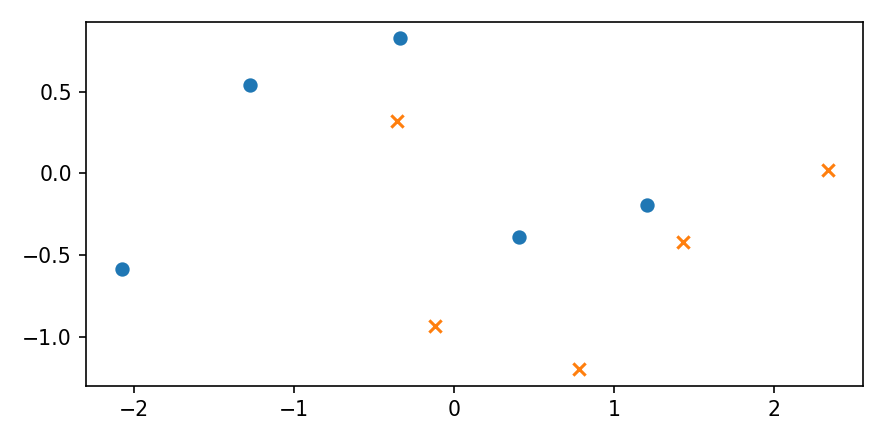

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

n_samples=10
x, y = make_moons(n_samples, # Varie este parámetro
                  shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.scatter(x[y==0, 0], x[y==0, 1], marker='o')
ax.scatter(x[y==1, 0], x[y==1, 1], marker='x')

x1, x2 = np.meshgrid(np.linspace(-3, 3, 100), 
                     np.linspace(-3, 3, 100))
x_test = np.vstack([x1.ravel(), x2.ravel()]).T

### 1.2) n_sample = 100

<IPython.core.display.Javascript object>


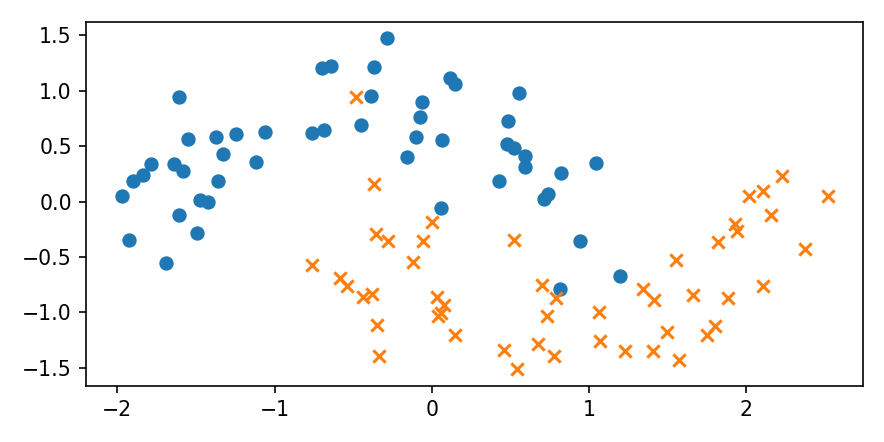

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
import warnings

n_samples=100
x, y = make_moons(n_samples, # Varie este parámetro
                  shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.scatter(x[y==0, 0], x[y==0, 1], marker='o')
ax.scatter(x[y==1, 0], x[y==1, 1], marker='x')

x1, x2 = np.meshgrid(np.linspace(-3, 3, 100), 
                     np.linspace(-3, 3, 100))
x_test = np.vstack([x1.ravel(), x2.ravel()]).T

## 2) Red neuronal bayesiana para M = 1, 3 y 10

In [116]:
#Modelo pymc3
import pymc3 as pm
import theano.tensor as T
from theano.tensor.nnet import sigmoid
mu=0
def modelo(M):
    with pm.Model() as bayes_reg:
        #Considerar los datos X como una variable deterministica
        X_data = pm.Data("x", x)
        # Se definen los prior
        Wz = pm.Normal(name='Wz', mu=0, sd=10, shape=(2,M))
        Bz = pm.Normal(name='Bz', mu=0, sd=10, shape=(M))
        Wy = pm.Normal(name='Wy', mu=0, sd=10, shape=(M,1))
        By = pm.Normal(name='By', mu=0, sd=10, shape=(1))

        Z=pm.Deterministic('Z', sigmoid(T.dot(x,Wz)+Bz))
        Y=pm.Deterministic('Y', sigmoid(T.dot(Z,Wy)+By))

        #Verosimilitud
        Y_obs = pm.Bernoulli('Y_obs', p=Y, observed=y)
    return bayes_reg

### 2.1) n_samples = 10

#### 2.1.1) M = 1

In [117]:
M=1
n_samples=10

In [118]:
#Entrenamiento de modelo con MCMC
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modelo(M):
    trace1_10 = pm.sample(draws=100, tune=500, chains=2, cores=2, step=pm.NUTS())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [By, Wy, Bz, Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:03<00:00, 328.79draws/s]
The acceptance probability does not match the target. It is 0.6623066835269523, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


<IPython.core.display.Javascript object>


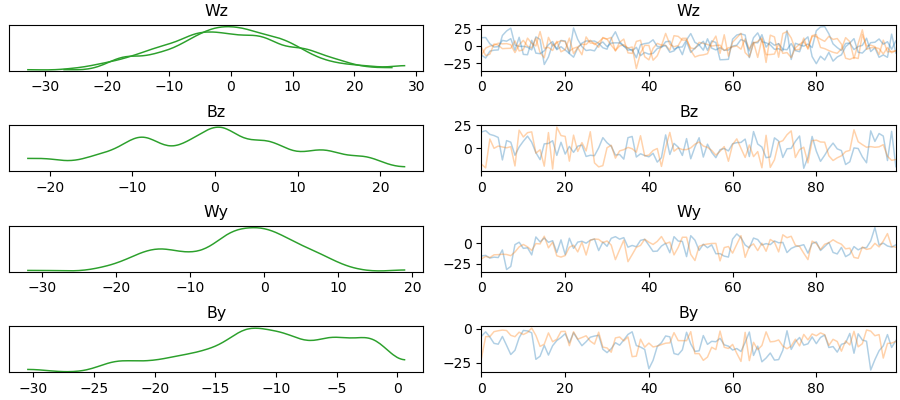

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [6]:
pm.traceplot(trace1_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

<IPython.core.display.Javascript object>


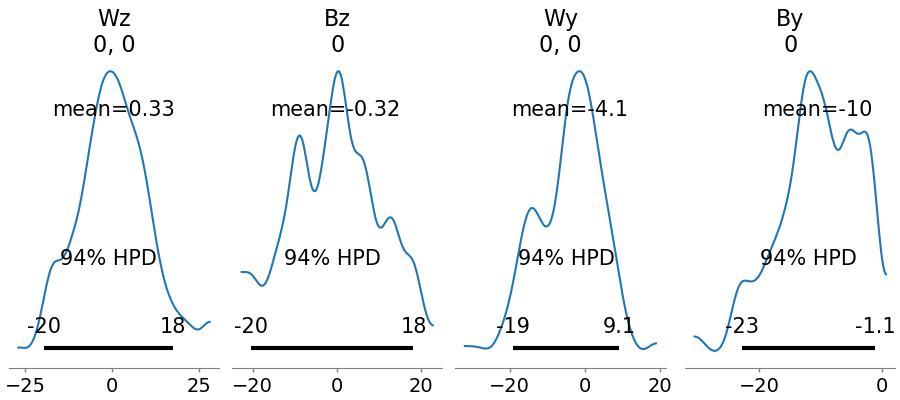

In [7]:
pm.plot_posterior(trace1_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);


<IPython.core.display.Javascript object>


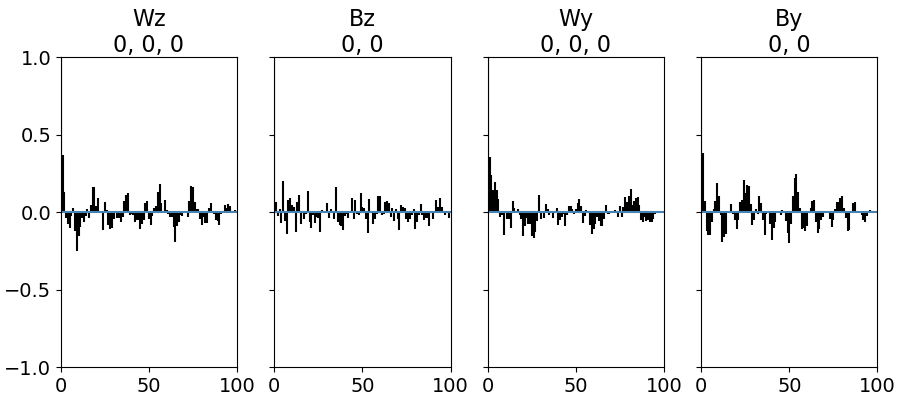

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E02BD71088>,
      dtype=object)

In [8]:
pm.plots.autocorrplot(trace1_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

In [9]:
pm.summary(trace1_10, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
Wz[0,0]   0.332   9.955 -19.595   17.581      0.950    0.700     110.0   
Wz[1,0]  -0.729  10.442 -19.820   18.337      0.856    0.704     149.0   
Bz[0]    -0.319  10.473 -20.317   18.318      0.764    0.824     188.0   
Wy[0,0]  -4.139   8.315 -18.976    9.138      0.919    0.652      82.0   
By[0]   -10.465   6.291 -22.766   -1.148      0.662    0.469      90.0   

         ess_sd  ess_bulk  ess_tail  r_hat  
Wz[0,0]   102.0     113.0      90.0   1.00  
Wz[1,0]   111.0     149.0     110.0   1.05  
Bz[0]      81.0     192.0     179.0   0.99  
Wy[0,0]    82.0      88.0     183.0   1.01  
By[0]      90.0      89.0     115.0   1.04

**Análisis:** Al saber que entrenaremos un modelo con 10 datos y solo 1 neurona, podemos inferir que la preducción no sera la mas óptima por la falta de información, esto se ve claramente reflejado en un comienzo, cuando los graficos de las trazas muestran un comportamiento bastante errático, en comparación a lo que sería una comportamiento aceptable como lo es el similar al ruido blanco. Por otro lado, aún podemos ver notables correlaciones, lo que nos dice que el modelo aun no es aceptable. Por último, si vemos la última tabla (sumary), la variable r_hat nos muestra valores entre 1.01 y 1.04, lo que nos dice que el modelo esta dentro de los parametros de aceptados pero, al no haber alguno en 1.00 y si hay cercano a 1.05 podemos decir claramente que este modelo que se puede mejorar.

#### 2.1.2) M = 3

In [10]:
M = 3

In [11]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modelo(M):
    trace3_10 = pm.sample(draws=100, tune=500, chains=2, cores=4, step=pm.NUTS())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [By, Wy, Bz, Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:07<00:00, 151.00draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.


<IPython.core.display.Javascript object>


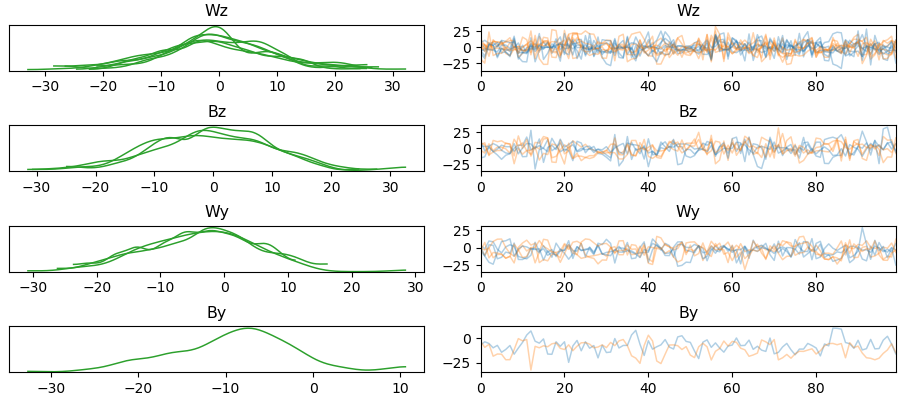

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [12]:
pm.traceplot(trace3_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [13]:
pm.summary(trace3_10, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz[0,0] -0.580   8.692 -16.681   15.352      0.578    0.602     227.0   105.0   
Wz[0,1]  0.158  10.037 -15.960   23.346      0.795    0.725     159.0    96.0   
Wz[0,2] -0.960  11.197 -22.706   20.118      0.721    0.941     241.0    71.0   
Wz[1,0]  0.035   9.024 -17.872   14.558      0.603    0.635     224.0   102.0   
Wz[1,1] -1.063  11.804 -21.152   21.594      1.160    0.958     104.0    77.0   
Wz[1,2]  0.200   9.233 -21.561   17.183      0.676    0.631     186.0   108.0   
Bz[0]   -0.247  10.700 -21.413   18.184      0.728    0.840     216.0    82.0   
Bz[1]   -0.779  10.714 -18.680   18.610      0.813    0.812     174.0    88.0   
Bz[2]   -0.023   8.968 -17.792   14.970      0.757    0.635     140.0   100.0   
Wy[0,0] -3.327   8.921 -19.914   12.352      0.805    0.571     123.0   123.0   
Wy[1,0] -4.314   8.105 -18.524    9.143      0.661    0.608     150.0    90.0   
Wy[2,0] -3.752   8.546 -16.926   12.863      0.709    0.503     145.0   145.0   
By[0]   -9.112   7.083 -22.141    3.522      0.888    0.631      64.0    64.0   

         ess_bulk  ess_tail  r_hat  
Wz[0,0]     224.0     187.0   1.00  
Wz[0,1]     168.0     105.0   1.02  
Wz[0,2]     232.0     122.0   1.01  
Wz[1,0]     233.0     137.0   1.00  
Wz[1,1]     107.0      83.0   1.00  
Wz[1,2]     184.0     152.0   1.00  
Bz[0]       223.0     180.0   1.05  
Bz[1]       174.0     154.0   1.01  
Bz[2]       142.0     154.0   1.05  
Wy[0,0]     122.0     132.0   1.01  
Wy[1,0]     149.0     181.0   1.07  
Wy[2,0]     145.0     155.0   1.01  
By[0]        86.0     116.0   1.05

<IPython.core.display.Javascript object>


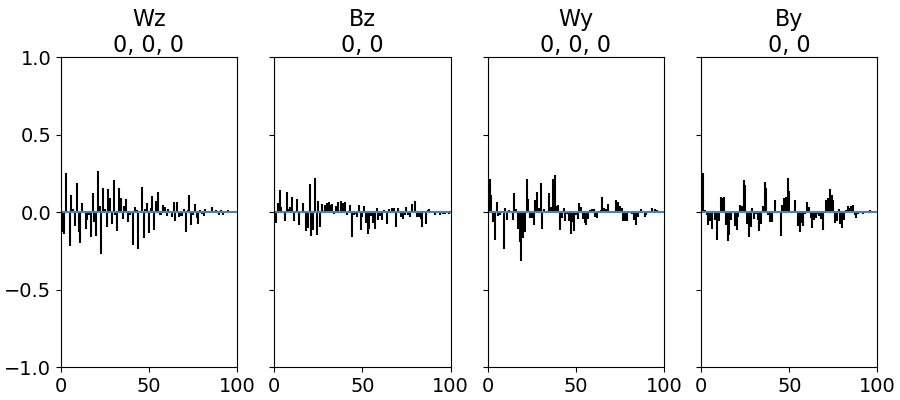

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E02A3BC648>,
      dtype=object)

In [14]:
pm.plots.autocorrplot(trace3_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

<IPython.core.display.Javascript object>


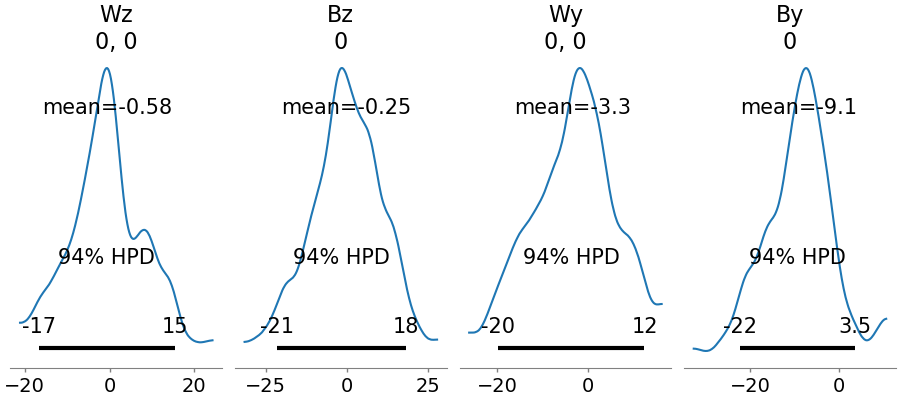

In [15]:
pm.plot_posterior(trace3_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Análisis:** Aún que hemos aumentado la cantidad de neuronas de 1 a 3, la verdad no podemos ver alguna mejora notable, los posteriosrs siguen irregulares, las trazas siguen lejos de llevar forma de ruido blanco, sigue existiendo bastante correlacion y por último el r_hat varía desde 1.00 hasta 1.07, lo que demuestra que si bien hay parametros que estan clavados en 1.00, hay otros que escapan de lo admisible.

#### 2.1.3) M = 10

In [16]:
M = 10

In [17]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modelo(M):
    trace10_10 = pm.sample(draws=100, tune=500, chains=2, cores=4, step=pm.NUTS())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [By, Wy, Bz, Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:17<00:00, 68.67draws/s] 
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.


<IPython.core.display.Javascript object>


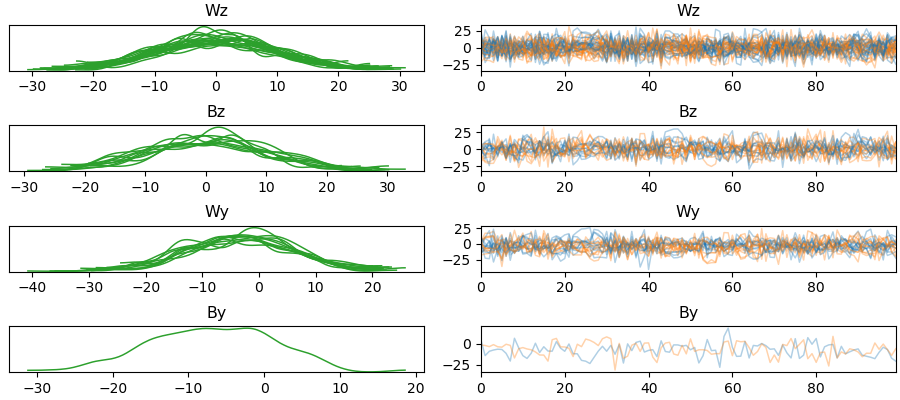

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [18]:
pm.traceplot(trace10_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [19]:
pm.summary(trace10_10, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz[0,0]  0.120  10.500 -21.358   18.274      0.924    0.746     129.0   100.0   
Wz[0,1]  1.134   9.874 -14.056   26.465      0.651    0.692     230.0   103.0   
Wz[0,2] -0.684   8.624 -18.001   15.954      0.836    0.685     106.0    80.0   
Wz[0,3]  0.496  10.036 -16.711   18.583      0.583    0.651     296.0   119.0   
Wz[0,4]  0.181   9.847 -16.746   20.093      0.916    0.688     116.0   103.0   
Wz[0,5] -0.943  10.025 -21.649   15.080      0.656    0.736     234.0    93.0   
Wz[0,6]  0.830   9.759 -18.823   16.526      0.866    0.662     127.0   109.0   
Wz[0,7] -0.175  10.023 -19.913   19.433      0.640    0.781     245.0    83.0   
Wz[0,8] -0.013   9.758 -16.938   17.627      0.778    0.580     157.0   142.0   
Wz[0,9] -0.184   9.791 -20.620   15.180      0.676    0.665     210.0   109.0   
Wz[1,0]  0.619  10.592 -18.967   19.857      0.756    0.820     196.0    84.0   
Wz[1,1]  0.524  10.891 -20.282   18.051      1.021    0.724     114.0   114.0   
Wz[1,2] -0.367   9.926 -21.754   14.976      1.535    1.093      42.0    42.0   
Wz[1,3] -1.015   9.736 -17.954   19.043      0.679    0.812     205.0    72.0   
Wz[1,4]  1.423  10.615 -18.103   23.841      0.706    0.804     226.0    88.0   
Wz[1,5]  0.290  10.520 -21.176   19.537      0.750    0.738     197.0   102.0   
Wz[1,6]  0.914   9.056 -16.630   14.756      0.627    0.636     209.0   102.0   
Wz[1,7] -0.645   8.396 -15.854   14.132      0.478    0.530     308.0   126.0   
Wz[1,8] -0.033  10.868 -18.827   19.594      0.666    0.798     266.0    93.0   
Wz[1,9]  0.813   9.659 -16.802   17.482      0.705    0.544     187.0   158.0   
Bz[0]    0.992  10.495 -18.536   20.122      1.073    0.952      96.0    61.0   
Bz[1]    0.894  10.683 -16.590   19.347      0.704    0.799     230.0    90.0   
Bz[2]   -1.102  10.397 -18.952   17.695      0.865    0.727     144.0   103.0   
Bz[3]    1.204   9.498 -18.827   16.029      0.667    0.645     203.0   109.0   
Bz[4]    0.736  10.190 -17.040   20.696      0.717    0.679     202.0   113.0   
Bz[5]    0.712   8.262 -19.444   12.266      0.540    0.491     234.0   142.0   
Bz[6]    2.385  11.064 -20.527   23.837      0.549    0.979     407.0    64.0   
Bz[7]    0.033   8.792 -16.370   15.444      0.610    0.552     208.0   127.0   
Bz[8]   -0.657  10.784 -20.369   18.888      0.740    0.723     212.0   112.0   
Bz[9]   -0.386   8.885 -16.392   15.620      0.776    0.556     131.0   128.0   
Wy[0,0] -2.835   9.244 -17.267   16.504      0.713    0.529     168.0   153.0   
Wy[1,0] -2.561   9.295 -18.762   14.369      0.649    0.600     205.0   121.0   
Wy[2,0] -3.921   9.982 -20.887   15.234      0.851    0.611     138.0   134.0   
Wy[3,0] -4.220   9.471 -22.806   12.859      0.807    0.695     138.0    93.0   
Wy[4,0] -4.315   9.977 -22.144   13.615      0.730    0.811     187.0    76.0   
Wy[5,0] -2.873   8.858 -23.421    9.845      0.781    0.554     129.0   129.0   
Wy[6,0] -3.118  10.443 -22.626   15.287      0.796    0.699     172.0   112.0   
Wy[7,0] -2.916  10.221 -23.188   15.586      0.951    0.674     116.0   116.0   
Wy[8,0] -2.410   9.659 -19.996   16.719      0.844    0.811     131.0    71.0   
Wy[9,0] -3.314  10.144 -24.317   13.868      0.808    0.617     158.0   136.0   
By[0]   -6.979   8.232 -22.303    6.492      0.615    0.448     179.0   169.0   

         ess_bulk  ess_tail  r_hat  
Wz[0,0]     128.0      80.0   1.01  
Wz[0,1]     221.0     138.0   1.00  
Wz[0,2]     106.0     117.0   1.02  
Wz[0,3]     356.0     165.0   1.01  
Wz[0,4]     110.0     123.0   1.01  
Wz[0,5]     246.0     137.0   1.00  
Wz[0,6]     124.0     122.0   1.00  
Wz[0,7]     235.0     153.0   0.99  
Wz[0,8]     151.0     162.0   1.00  
Wz[0,9]     206.0     154.0   1.01  
Wz[1,0]     196.0     152.0   1.02  
Wz[1,1]     120.0     186.0   1.01  
Wz[1,2]      43.0      76.0   1.05  
Wz[1,3]     203.0      79.0   1.01  
Wz[1,4]     217.0     131.0   1.01  
Wz[1,5]     200

<IPython.core.display.Javascript object>


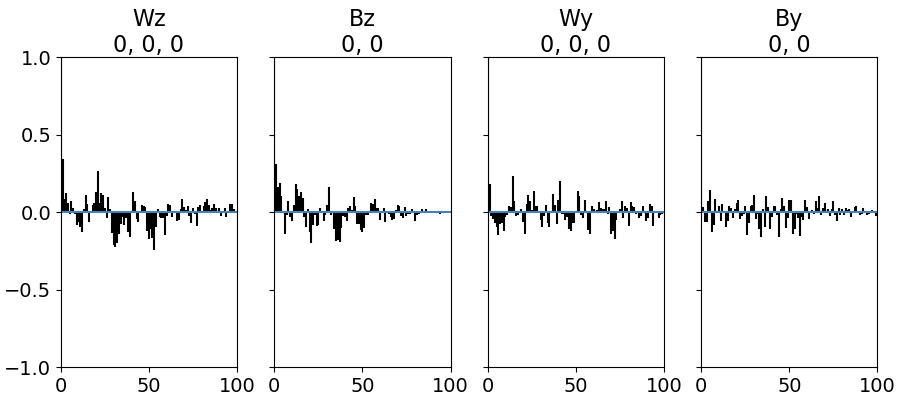

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E02EB5D3C8>,
      dtype=object)

In [20]:
pm.plots.autocorrplot(trace10_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

<IPython.core.display.Javascript object>


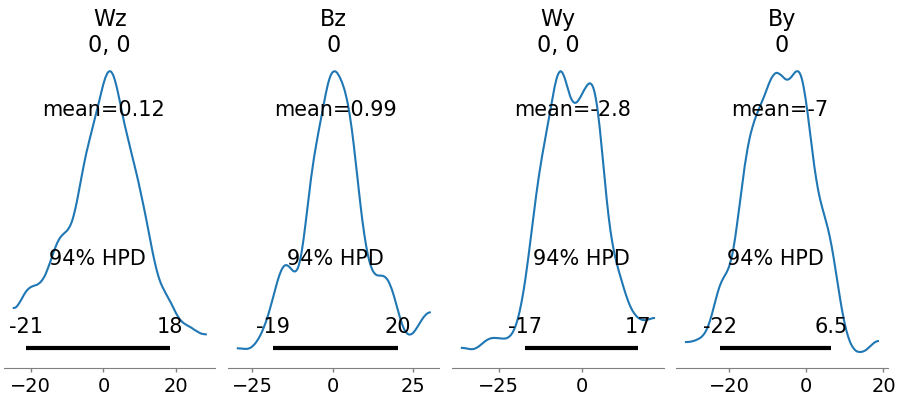

In [21]:
pm.plot_posterior(trace10_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Análisis:** Podemos ver una leve mejora al aplicar 10 neuronas en la capa, reflejando unas trazas un poco mas estables, un r_hat un poco mas cercano a 1.00 y la correlacion se comienza a estabilizar, sin embargo los posterior siguen muy irregulares.

### 2.2) n_samples = 100

#### 2.2.1) M = 1

In [107]:
M = 1
n_samples=100


In [108]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modelo(M):
    trace1_100 = pm.sample(draws=100, tune=500, chains=2, cores=4, step=pm.NUTS())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [By, Wy, Bz, Wz]
Sampling 2 chains, 8 divergences: 100%|██████████| 1200/1200 [00:47<00:00, 25.37draws/s]
The acceptance probability does not match the target. It is 0.9797705045601213, but should be close to 0.8. Try to increase the number of tuning steps.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.


In [109]:
pm.traceplot(trace1_100, figsize=(6, 3), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

ImportError: cannot import name '_cov' from 'arviz.utils' (/home/felipe/anaconda3/lib/python3.8/site-packages/arviz/utils.py)

In [25]:
pm.summary(trace1_100, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
Wz[0,0]   0.289   9.990 -15.482   21.053      0.900    0.706     123.0   
Wz[1,0]  -1.218   9.705 -17.790   17.075      0.828    0.620     137.0   
Bz[0]    -0.971  10.472 -23.690   13.431      1.059    0.835      98.0   
Wy[0,0]  -3.706   7.804 -16.818   11.021      0.860    0.705      82.0   
By[0]   -11.260   5.248 -22.002   -4.111      0.594    0.439      78.0   

         ess_sd  ess_bulk  ess_tail  r_hat  
Wz[0,0]   101.0     137.0     131.0   1.03  
Wz[1,0]   123.0     139.0     134.0   1.00  
Bz[0]      79.0     106.0      74.0   1.00  
Wy[0,0]    62.0      84.0      97.0   1.03  
By[0]      72.0      92.0     103.0   1.01

<IPython.core.display.Javascript object>


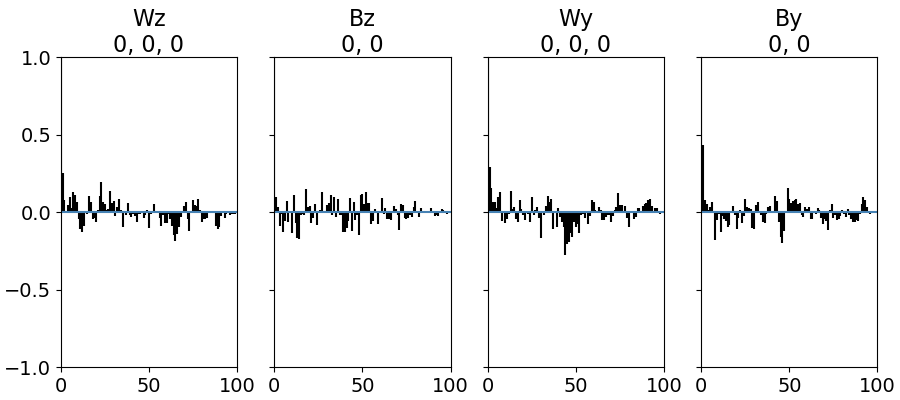

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E02E1C8FC8>,
      dtype=object)

In [26]:
pm.plots.autocorrplot(trace1_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

<IPython.core.display.Javascript object>


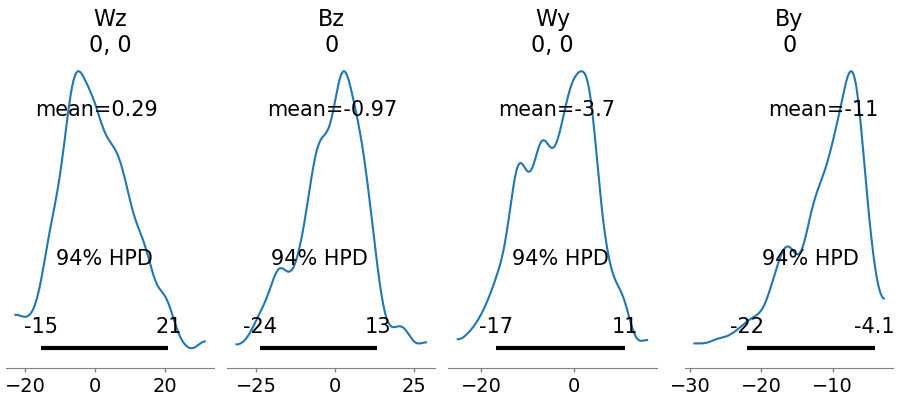

In [27]:
pm.plot_posterior(trace1_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Respuesta:** Ahora estamos utilizando diez veces mas datos que en el apartado 2.1, sin embargo al comparar con los resultados obtenidos con 1 neurona, vemos un peor desempeño en todos los sentidos, un r_hat que varia entre 1.02 y 1.09, una correlación bastante marcada, posterior muy irregular y unas trazas que no definen alguna forma.

#### 2.2.2) M = 3

In [28]:
M = 3

In [29]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modelo(M):
    trace3_100 = pm.sample(draws=100, tune=500, chains=2, cores=4, step=pm.NUTS())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [By, Wy, Bz, Wz]
Sampling 2 chains, 4 divergences: 100%|██████████| 1200/1200 [00:09<00:00, 123.01draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.


<IPython.core.display.Javascript object>


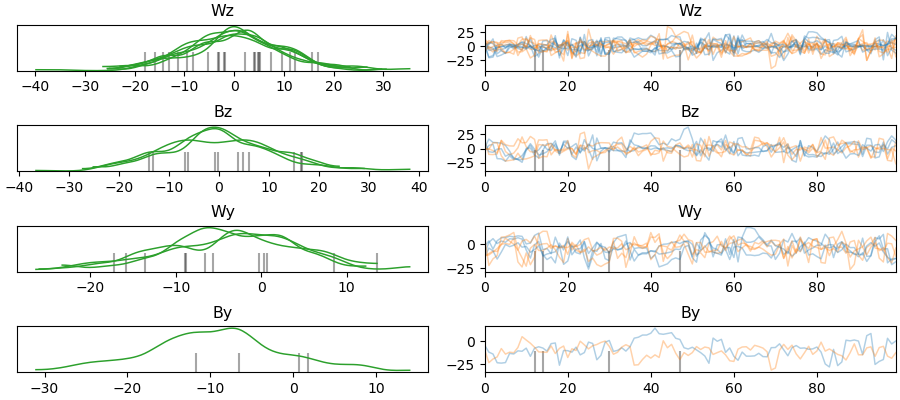

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [30]:
pm.traceplot(trace3_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [31]:
pm.summary(trace3_100, var_names=['Wz', 'Bz', 'Wy', 'By'])

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz[0,0] -0.444   9.620 -22.119   16.800      0.593    0.702     263.0    95.0   
Wz[0,1]  1.500  10.381 -20.949   19.826      1.026    1.129     102.0    43.0   
Wz[0,2] -0.121   9.407 -19.414   14.542      0.822    0.582     131.0   131.0   
Wz[1,0] -0.329   9.873 -20.941   16.761      0.771    0.759     164.0    85.0   
Wz[1,1] -0.042   9.428 -17.563   14.605      1.285    0.914      54.0    54.0   
Wz[1,2] -0.339   9.297 -17.834   14.991      0.865    0.651     116.0   102.0   
Bz[0]    0.158  11.740 -22.518   18.325      1.619    1.151      53.0    53.0   
Bz[1]    0.582  10.174 -18.494   19.557      0.792    0.686     165.0   111.0   
Bz[2]   -1.123  10.544 -21.911   18.989      0.980    0.728     116.0   105.0   
Wy[0,0] -3.846   8.425 -18.486   12.069      0.894    0.634      89.0    89.0   
Wy[1,0] -3.839   7.054 -17.526    8.792      0.622    0.441     129.0   129.0   
Wy[2,0] -3.615   8.456 -21.188    9.258      0.809    0.631     109.0    90.0   
By[0]   -9.492   8.224 -23.791    8.511      1.275    0.908      42.0    42.0   

         ess_bulk  ess_tail  r_hat  
Wz[0,0]     239.0     194.0   1.00  
Wz[0,1]     116.0      45.0   1.02  
Wz[0,2]     132.0     147.0   1.00  
Wz[1,0]     160.0     124.0   1.00  
Wz[1,1]      50.0     123.0   1.05  
Wz[1,2]     110.0      96.0   1.01  
Bz[0]        63.0      66.0   1.03  
Bz[1]       168.0      73.0   1.02  
Bz[2]       117.0     129.0   1.01  
Wy[0,0]      87.0     123.0   1.00  
Wy[1,0]     127.0     155.0   1.02  
Wy[2,0]     109.0      97.0   1.00  
By[0]        45.0      27.0   1.02

<IPython.core.display.Javascript object>


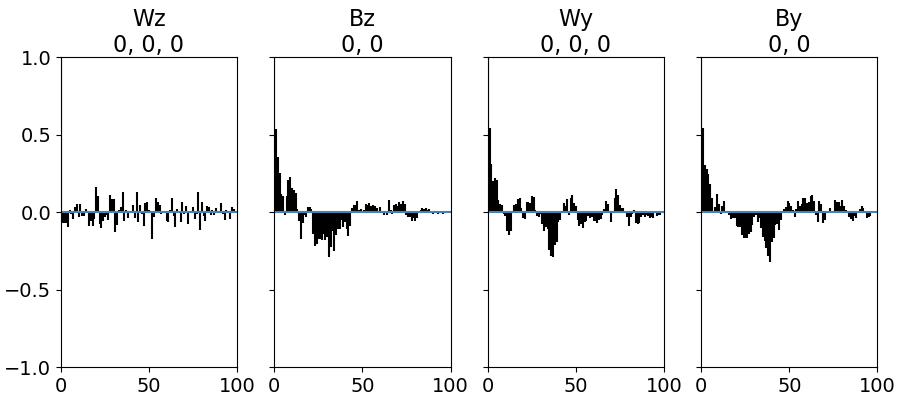

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E02F72FAC8>,
      dtype=object)

In [32]:
pm.plots.autocorrplot(trace3_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

<IPython.core.display.Javascript object>


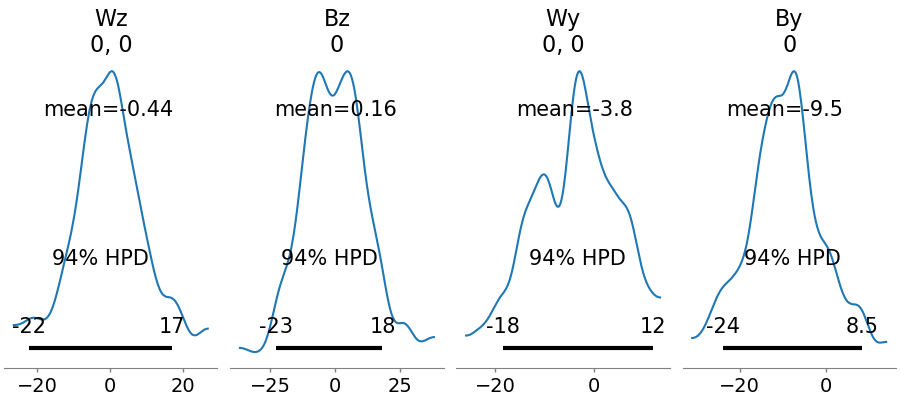

In [33]:
pm.plot_posterior(trace3_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Respuesta:** Podemos ver una mejora en algunos parámetros, un posterior con forma bastante mas regular, una correlación bastante menos marcada, sin embargo, aún no podemos ver una traza que tenga forma de ruido blanco, o un r_hat que lotre estar muy cerca de 1.00.

#### 2.2.3) M = 10

In [35]:
M = 10

In [36]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modelo(M):
    trace10_100 = pm.sample(draws=100, tune=500, chains=2, cores=4, step=pm.NUTS())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [By, Wy, Bz, Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:17<00:00, 69.10draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.


<IPython.core.display.Javascript object>


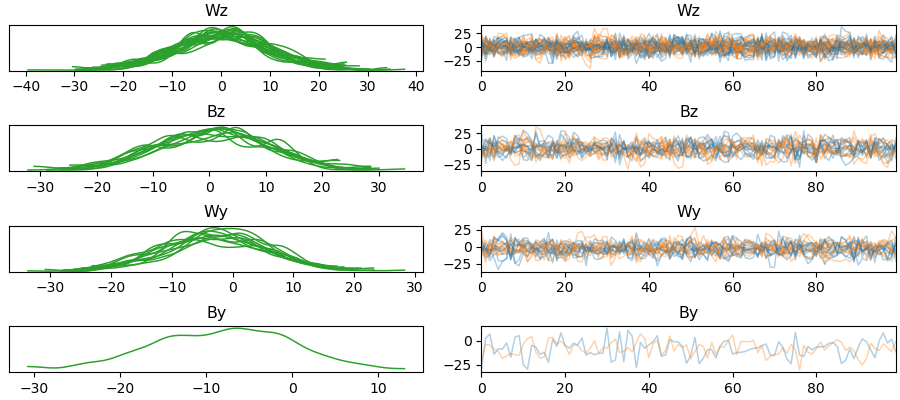

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [37]:
pm.traceplot(trace10_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [38]:
pm.summary(trace10_100, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz[0,0] -0.421   9.919 -22.055   15.154      0.718    0.570     191.0   152.0   
Wz[0,1]  0.167   8.879 -14.718   17.169      0.693    0.515     164.0   149.0   
Wz[0,2] -0.403   9.880 -19.773   17.463      0.731    0.594     183.0   139.0   
Wz[0,3]  0.869  11.187 -20.070   21.803      0.813    0.951     189.0    70.0   
Wz[0,4]  1.207  10.780 -18.989   22.172      1.010    0.770     114.0    99.0   
Wz[0,5]  1.145   9.273 -21.430   14.731      0.719    0.635     166.0   107.0   
Wz[0,6] -0.851   9.379 -17.041   16.912      0.711    0.796     174.0    70.0   
Wz[0,7]  0.953   9.324 -13.742   20.738      0.684    0.817     186.0    66.0   
Wz[0,8]  0.976  10.321 -16.891   18.788      0.882    0.670     137.0   119.0   
Wz[0,9]  0.312   8.884 -16.370   16.929      0.967    1.055      84.0    36.0   
Wz[1,0] -0.165  10.405 -20.569   18.220      0.913    0.663     130.0   124.0   
Wz[1,1] -0.575   9.205 -20.550   12.791      0.725    0.689     161.0    90.0   
Wz[1,2] -0.764  10.256 -18.981   20.416      0.837    0.703     150.0   107.0   
Wz[1,3]  0.329   9.526 -20.854   14.430      0.639    0.709     222.0    91.0   
Wz[1,4]  0.498   9.865 -17.179   18.864      0.834    0.750     140.0    87.0   
Wz[1,5]  1.107  10.505 -18.424   23.160      0.804    0.679     171.0   120.0   
Wz[1,6]  1.103   9.354 -15.394   18.028      0.769    0.675     148.0    96.0   
Wz[1,7]  0.133  10.315 -18.497   20.828      0.818    0.819     159.0    80.0   
Wz[1,8]  0.731  10.023 -20.520   16.014      0.820    0.661     149.0   115.0   
Wz[1,9]  0.848  10.605 -20.358   19.520      0.811    0.712     171.0   111.0   
Bz[0]    0.080   9.946 -18.484   17.842      0.781    0.615     162.0   131.0   
Bz[1]    0.757  10.829 -21.101   17.884      0.911    0.749     141.0   105.0   
Bz[2]    1.278   9.415 -14.603   16.677      0.848    0.612     123.0   119.0   
Bz[3]   -0.301  10.319 -20.624   17.206      0.961    0.773     115.0    90.0   
Bz[4]    1.460  10.288 -17.601   20.698      0.855    0.713     145.0   105.0   
Bz[5]    0.887  10.617 -18.225   20.120      0.791    0.651     180.0   134.0   
Bz[6]    0.427  10.361 -17.402   18.390      0.968    0.805     115.0    83.0   
Bz[7]    0.214  10.785 -19.229   21.917      0.876    0.744     152.0   106.0   
Bz[8]    0.870  10.356 -17.482   21.388      0.887    0.629     136.0   136.0   
Bz[9]    1.525   9.446 -15.036   20.716      0.725    0.569     170.0   139.0   
Wy[0,0] -3.818   8.675 -20.806   12.215      0.664    0.504     170.0   149.0   
Wy[1,0] -2.393   8.024 -19.477   11.613      0.720    0.511     124.0   124.0   
Wy[2,0] -1.496   8.582 -18.528   12.601      0.727    0.515     139.0   139.0   
Wy[3,0] -1.319   8.137 -17.978   13.693      0.719    0.689     128.0    70.0   
Wy[4,0] -3.233   8.673 -20.638   11.903      0.732    0.519     140.0   140.0   
Wy[5,0] -2.345   8.207 -17.920   12.387      0.595    0.518     190.0   126.0   
Wy[6,0] -2.893   8.481 -16.644   13.815      0.862    0.611      97.0    97.0   
Wy[7,0] -3.158   9.054 -18.731   12.285      0.792    0.578     131.0   123.0   
Wy[8,0] -4.064   9.481 -19.347   14.732      0.864    0.740     120.0    83.0   
Wy[9,0] -2.564   9.281 -20.032   14.952      0.733    0.629     160.0   109.0   
By[0]   -8.224   8.494 -25.467    6.790      0.607    0.468     196.0   165.0   

         ess_bulk  ess_tail  r_hat  
Wz[0,0]     194.0     187.0   1.02  
Wz[0,1]     168.0     171.0   1.01  
Wz[0,2]     182.0     142.0   1.01  
Wz[0,3]     191.0     106.0   1.02  
Wz[0,4]     118.0      74.0   1.06  
Wz[0,5]     163.0     129.0   1.00  
Wz[0,6]     197.0     121.0   1.01  
Wz[0,7]     195.0      73.0   1.00  
Wz[0,8]     134.0     135.0   1.01  
Wz[0,9]      92.0      46.0   1.03  
Wz[1,0]     130.0     130.0   1.02  
Wz[1,1]     166.0     110.0   1.02  
Wz[1,2]     151.0     145.0   1.00  
Wz[1,3]     220.0     143.0   1.00  
Wz[1,4]     145.0      99.0   1.00  
Wz[1,5]     174

<IPython.core.display.Javascript object>


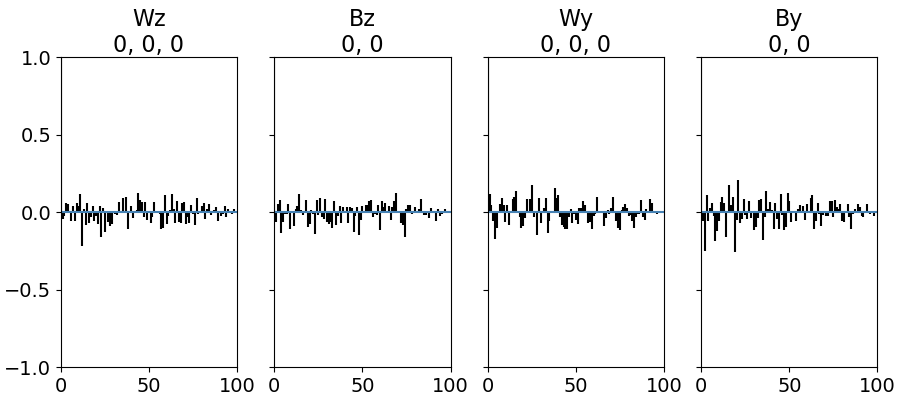

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E031AB0608>,
      dtype=object)

In [39]:
pm.plots.autocorrplot(trace10_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

<IPython.core.display.Javascript object>


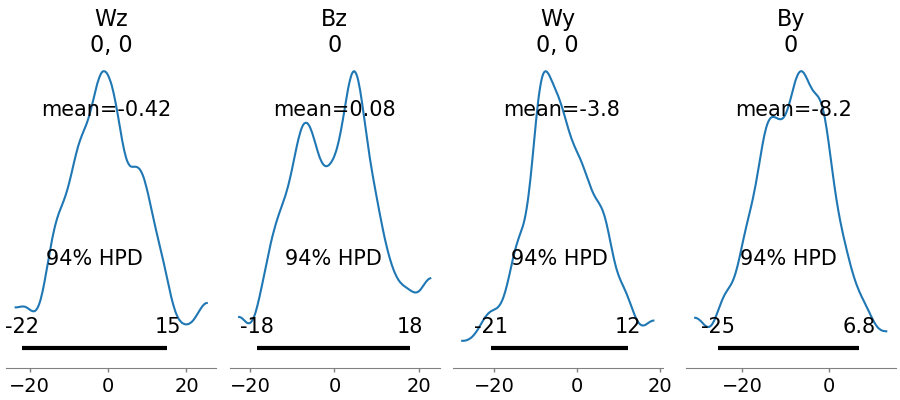

In [40]:
pm.plot_posterior(trace10_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Respuesta:** Podemos observar que los resultados no son muy diferentes al resto, sin embargo, podemos notar una pequeña mejora respecto a los anteriores, de manera que el r_hat mas alto es de 1.03 y hay muchos en 1.00, las trazas estan comenzando a tomar una forma de ruido blanco. Por otro lado, los posteriors siguen bastante irregulares y no logramos eliminar hasta niveles aceptables la correlación.

## 3) Seleccione y calibre un algoritmo de MCMC para entrenar este modelo. Justifique y respalde sus decisiones en base al comportamiento de las trazas, al estadístico Gelman-Rubin y a la función de autocorrelación

### Modelo utilizado
##### El modelo utilizado es NUTS ya que en comparación a  Metropolis Hastings....
**Tu tienes que justificar tu elección de NUTS, puedes hacerlo mediante una comparaicón con Metropolis por ejemplo** $Palabras$ $del$ $profe$

In [42]:
def modeloHamilton(M):
    with pm.Model() as bayes_reg:
        #Considerar los datos X como una variable deterministica
        X_data = pm.Data("x", x)
        # Se definen los prior
        Wz = pm.Normal(name='Wz', mu=0, sd=10, shape=())
        Bz = pm.Normal(name='Bz', mu=0, sd=10, shape=())
        Wy = pm.Normal(name='Wy', mu=0, sd=10, shape=())
        By = pm.Normal(name='By', mu=0, sd=10, shape=())

        Z=sigmoid(T.dot(x,Wz)+Bz)
        Y=sigmoid(T.dot(Z,Wy)+By)

        #Verosimilitud
        Y_obs = pm.Bernoulli('Y_obs', p=Y, observed=Y)
        return bayes_reg

### Número de Muestras igual a 10

In [43]:
n_samples=10

#### M = 1

In [44]:
M = 1

In [45]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modeloHamilton(M):
    traceH1_10 = pm.sample(draws=100, tune=500, chains=2, cores=2, step=pm.Metropolis())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [By]
>Metropolis: [Wy]
>Metropolis: [Bz]
>Metropolis: [Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:01<00:00, 693.64draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.


<IPython.core.display.Javascript object>


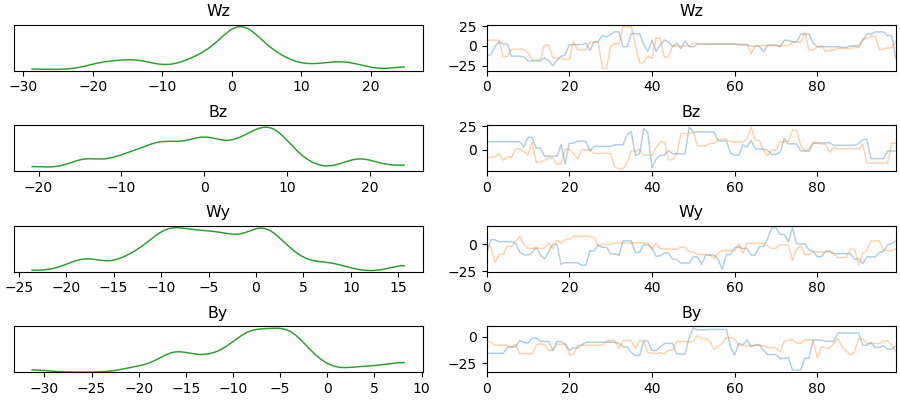

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [46]:
pm.traceplot(traceH1_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [47]:
pm.summary(traceH1_10, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz -0.280  9.958 -19.014   17.993      1.709    1.219      34.0    34.0   
Bz  1.703  9.357 -15.220   19.041      2.449    1.767      15.0    15.0   
Wy -4.737  7.066 -18.022    7.642      1.338    0.956      28.0    28.0   
By -7.913  6.722 -17.709    6.866      1.134    0.808      35.0    35.0   

    ess_bulk  ess_tail  r_hat  
Wz      43.0      53.0   1.11  
Bz      14.0      59.0   1.10  
Wy      28.0      58.0   1.09  
By      39.0      13.0   1.08

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


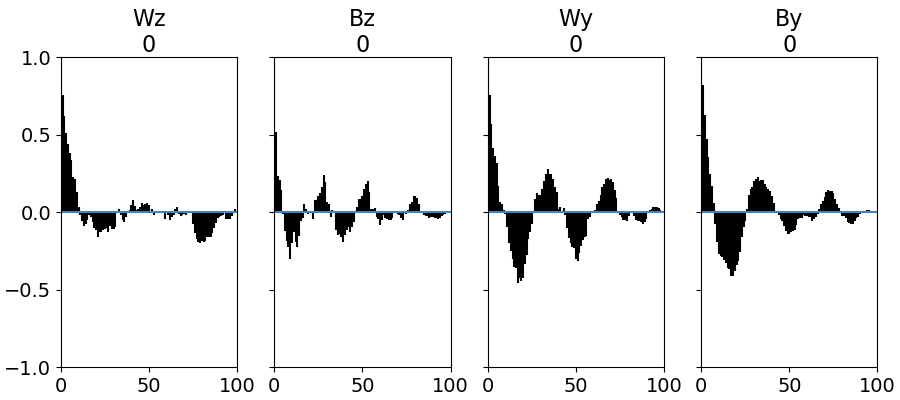

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E033C140C8>,
      dtype=object)

In [48]:
pm.plots.autocorrplot(traceH1_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


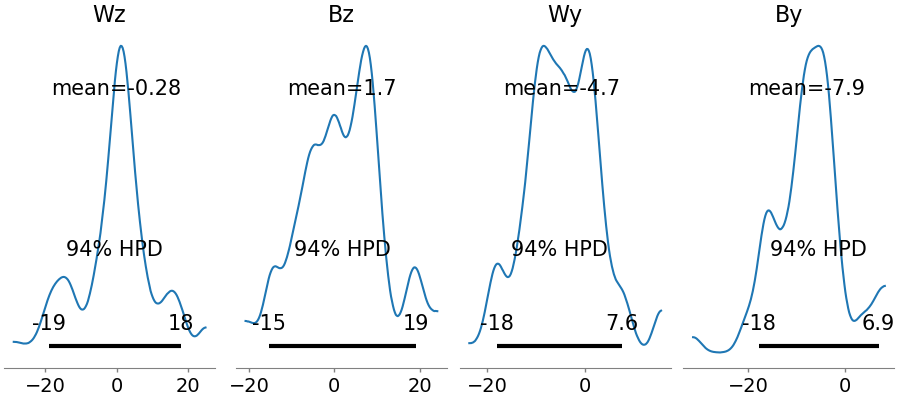

In [49]:
pm.plot_posterior(traceH1_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Análisis:** Podemos observar que el comportamiento de las trazas es bastante errático, muy alejado de lo que sería un ruido blanco. De la misma forma podemos ver los comportamientos de los posterior, tomando una forma amorfa. Al observar la tabla de resumen podemos notar que lo r_hat estan bastante lejos del 1.00 e incluso están por arriba del 1.05, lo que nos confirma que es un modelo muy deficiente. Si lo comparamos con el otro algoritmo de MCMC (NUTS()), podemos ver que se comporta de manera mas deficiente en todos los aspectos estudiados.

#### M = 3

In [50]:
M = 3

In [51]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modeloHamilton(M):
    traceH3_10 = pm.sample(draws=100, tune=500, chains=2, cores=2, step=pm.Metropolis())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [By]
>Metropolis: [Wy]
>Metropolis: [Bz]
>Metropolis: [Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:01<00:00, 702.17draws/s] 
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(len(plotters), 2, squeeze=False, figsize=figsize, **backend_kwargs)


<IPython.core.display.Javascript object>


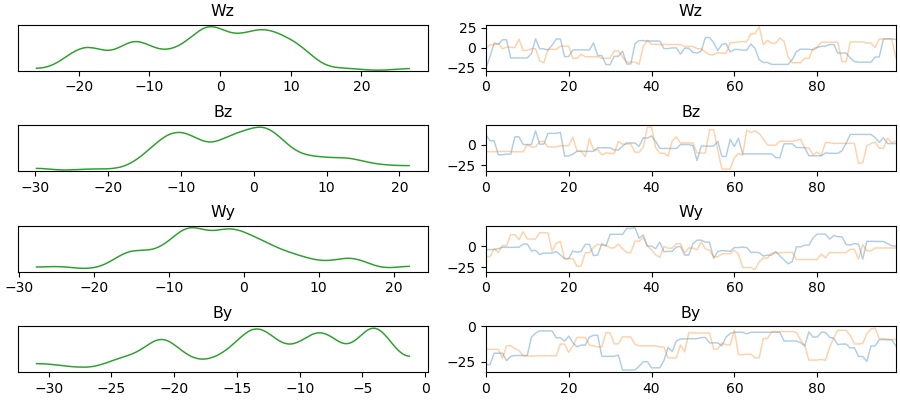

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [52]:
pm.traceplot(traceH3_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [53]:
pm.summary(traceH3_10, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz  -2.547  10.118 -20.814   11.339      1.455    1.035      48.0    48.0   
Bz  -2.366   9.438 -16.107   16.805      1.090    0.934      75.0    52.0   
Wy  -2.862   9.539 -18.544   16.035      1.886    1.349      26.0    26.0   
By -13.098   7.396 -25.056   -1.879      1.865    1.344      16.0    16.0   

    ess_bulk  ess_tail  r_hat  
Wz      50.0      61.0   1.04  
Bz      79.0      86.0   1.01  
Wy      22.0      60.0   1.12  
By      17.0      20.0   1.11

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


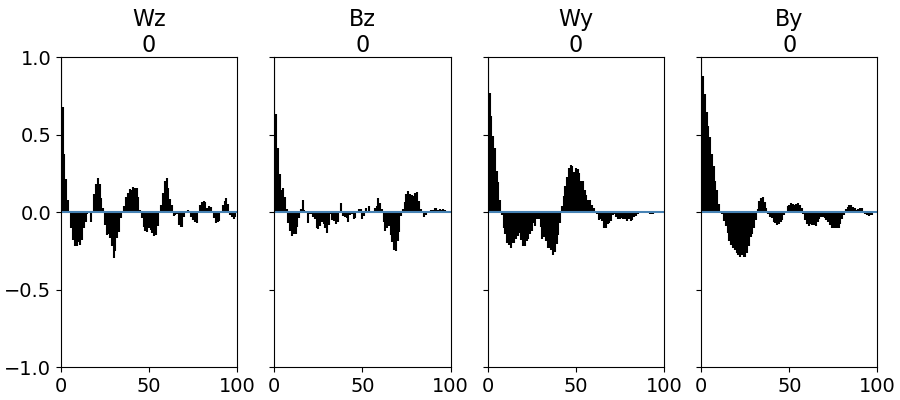

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E034F23848>,
      dtype=object)

In [54]:
pm.plots.autocorrplot(traceH3_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


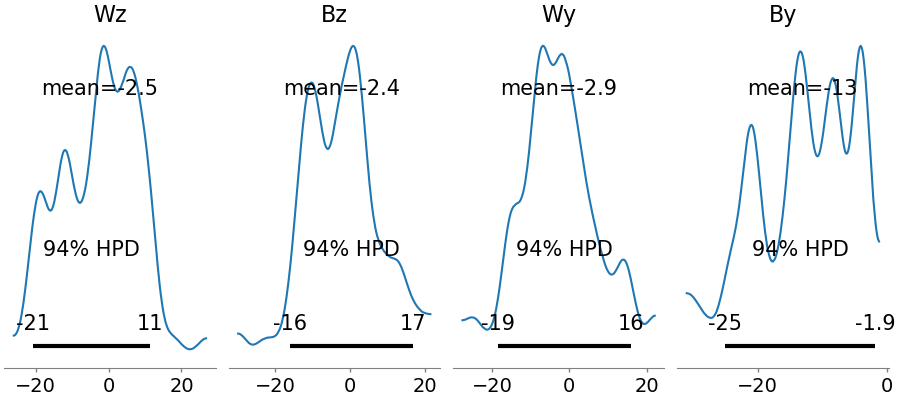

In [55]:
pm.plot_posterior(traceH3_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

#### M = 10

In [56]:
M = 10

In [57]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modeloHamilton(M):
    traceH10_10 = pm.sample(draws=100, tune=500, chains=2, cores=2, step=pm.Metropolis())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [By]
>Metropolis: [Wy]
>Metropolis: [Bz]
>Metropolis: [Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:01<00:00, 707.97draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(len(plotters), 2, squeeze=False, figsize=figsize, **backend_kwargs)


<IPython.core.display.Javascript object>


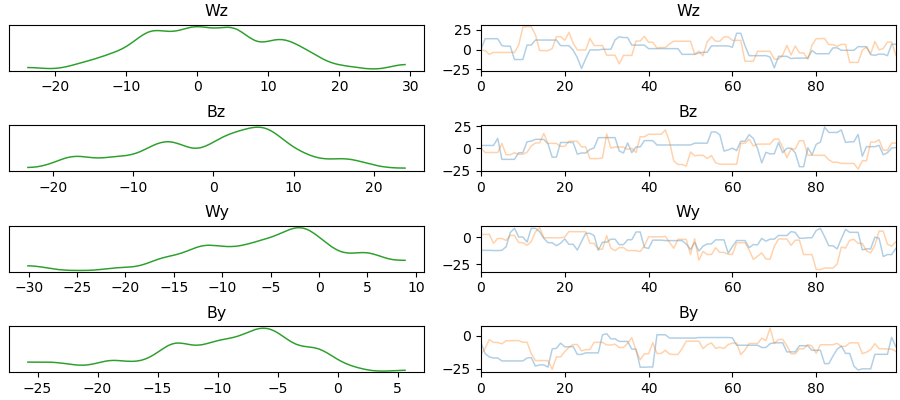

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [58]:
pm.traceplot(traceH10_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [59]:
pm.summary(traceH10_10, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz  1.731  9.620 -16.186   16.483      1.315    0.935      54.0    54.0   
Bz  0.456  9.897 -17.745   17.878      1.479    1.053      45.0    45.0   
Wy -5.636  7.815 -17.989    8.287      2.300    1.669      12.0    12.0   
By -9.662  6.396 -23.712   -1.343      1.117    0.831      33.0    30.0   

    ess_bulk  ess_tail  r_hat  
Wz      54.0      72.0   1.05  
Bz      50.0      63.0   1.06  
Wy      13.0      45.0   1.14  
By      38.0      64.0   1.08

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


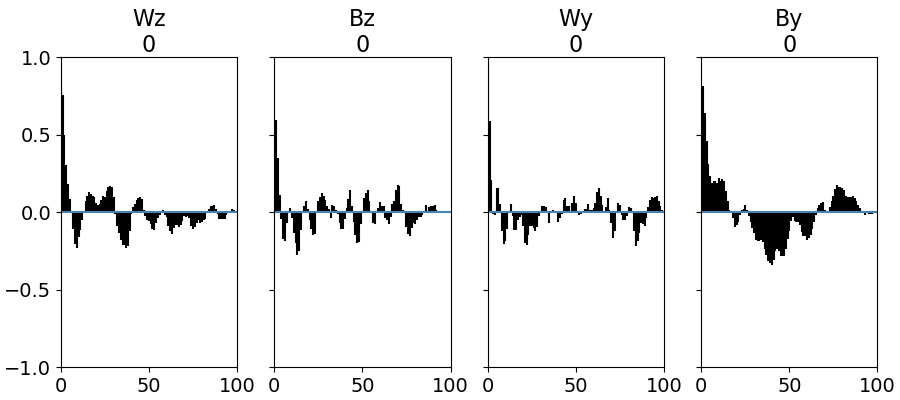

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E034F40F88>,
      dtype=object)

In [60]:
pm.plots.autocorrplot(traceH10_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


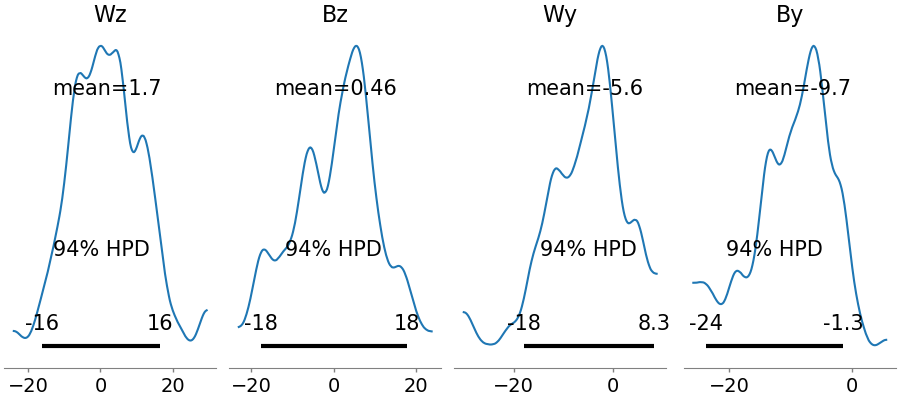

In [61]:
pm.plot_posterior(traceH10_10, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Análisis:** Podemos observar que al aumentar el número de meustras, el algoritmo no logra modelarse a un punto aceptable, teniendo un r_hat desde 1.04 hasta 1.10, bastante correlacion en general, unos posteriors deficientes y trazas erráticas. Se concluye entonces que con 1 sola neurona, el algoritmo **Metrópolis()** es peor que el **NUTS()**.

### Numero de muestras igual a 100

In [62]:
n_samples=100

#### M = 1

In [63]:
M = 1

In [64]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modeloHamilton(M):
    traceH1_100 = pm.sample(draws=100, tune=500, chains=2, cores=2, step=pm.Metropolis())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [By]
>Metropolis: [Wy]
>Metropolis: [Bz]
>Metropolis: [Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:01<00:00, 636.94draws/s] 
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(len(plotters), 2, squeeze=False, figsize=figsize, **backend_kwargs)


<IPython.core.display.Javascript object>


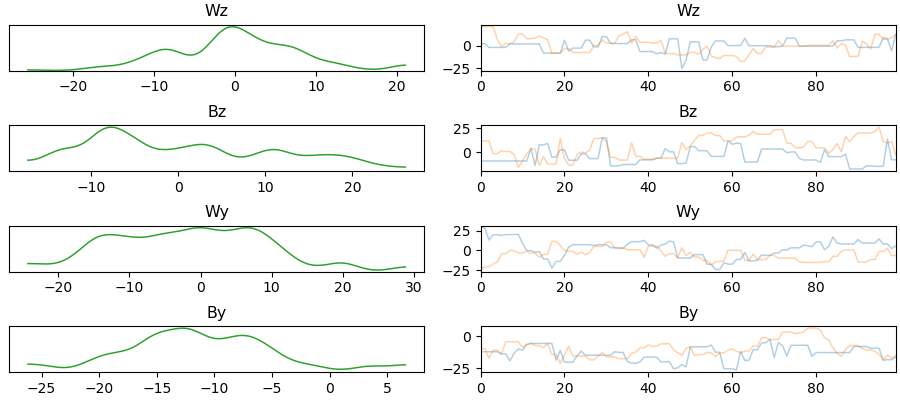

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [65]:
pm.traceplot(traceH1_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [66]:
pm.summary(traceH1_100, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz  -0.135   7.629 -14.335   12.786      1.268    0.904      36.0    36.0   
Bz   0.659  10.828 -14.492   20.048      5.353    4.094       4.0     4.0   
Wy  -1.547  10.443 -17.550   19.906      3.718    2.733       8.0     8.0   
By -11.221   6.357 -25.312   -0.942      1.469    1.055      19.0    19.0   

    ess_bulk  ess_tail  r_hat  
Wz      37.0      36.0   1.09  
Bz       5.0      17.0   1.42  
Wy       8.0      16.0   1.18  
By      20.0      21.0   1.11

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


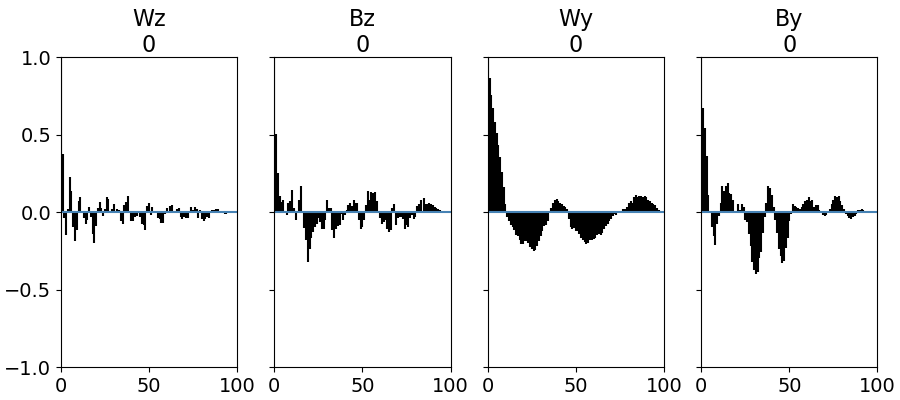

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E037F0D888>,
      dtype=object)

In [67]:
pm.plots.autocorrplot(traceH1_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


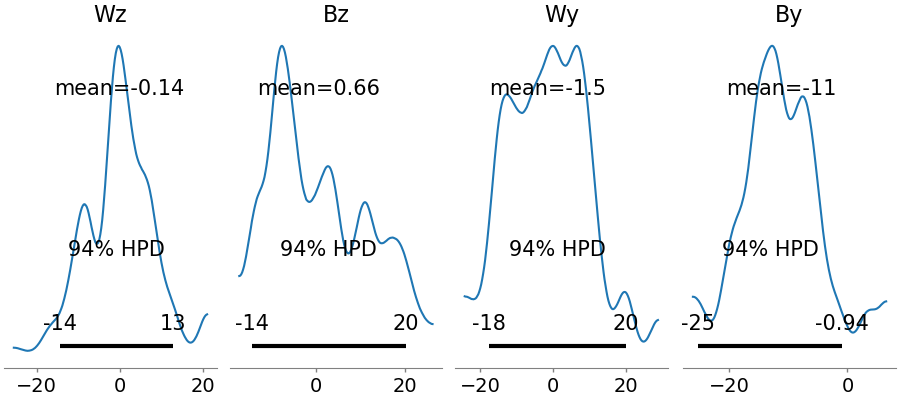

In [68]:
pm.plot_posterior(traceH1_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

**Análisis:** Podemos ver una mejora respecto al modelo entrenada con solo 10 samples, el r_hat va de 1.01 hasta 1.07 y los posteriors comienzan a tener forma, sin embargo, hay mucha correlacion a esta altura y las trazas siguen teniendo un comportamiento deficiente. Al compararlo con **NUTS()** podemos seguir afirmando que **Metrópolis()** sigue en desventaja notablemente.


#### M = 3

In [69]:
M = 3

In [70]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modeloHamilton(M):
    traceH3_100 = pm.sample(draws=100, tune=500, chains=2, cores=2, step=pm.Metropolis())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [By]
>Metropolis: [Wy]
>Metropolis: [Bz]
>Metropolis: [Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:01<00:00, 628.93draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(len(plotters), 2, squeeze=False, figsize=figsize, **backend_kwargs)


<IPython.core.display.Javascript object>


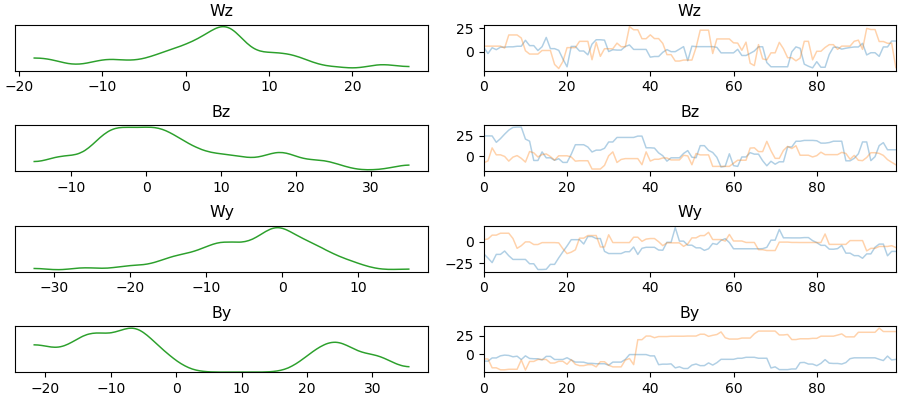

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [71]:
pm.traceplot(traceH3_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [72]:
pm.summary(traceH3_100, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz  2.740   9.323 -17.133   17.919      1.453    1.035      41.0    41.0   
Bz  3.870  10.653 -11.832   24.552      3.436    2.507      10.0    10.0   
Wy -4.299   8.816 -20.770   10.034      2.957    2.275       9.0     8.0   
By  0.865  17.542 -21.680   29.850     10.328    8.203       3.0     3.0   

    ess_bulk  ess_tail  r_hat  
Wz      42.0      66.0   1.05  
Bz      11.0      15.0   1.17  
Wy      13.0      11.0   1.15  
By       4.0      26.0   1.58

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


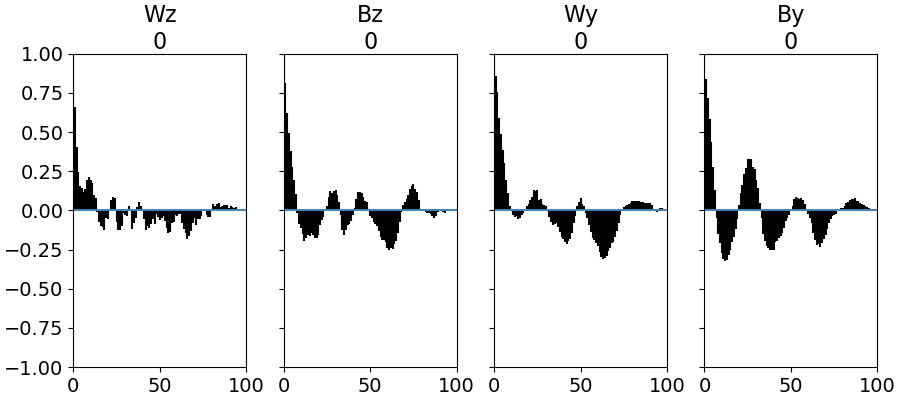

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E03B257BC8>,
      dtype=object)

In [73]:
pm.plots.autocorrplot(traceH3_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


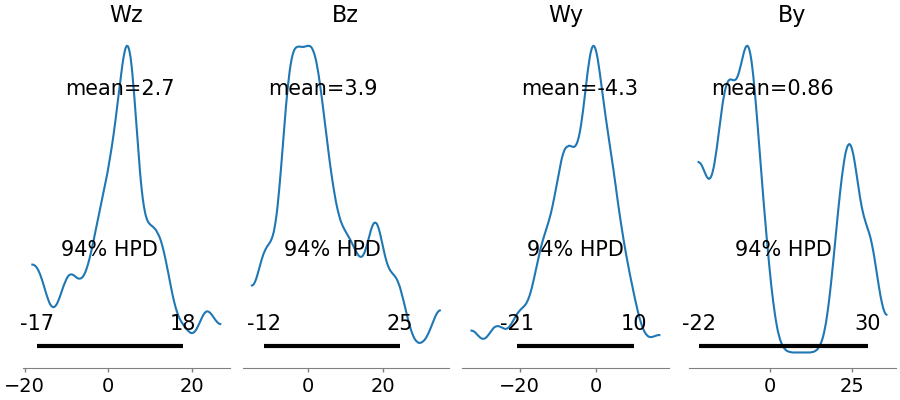

In [74]:
pm.plot_posterior(traceH3_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

#### M = 10

In [75]:
M = 10

In [76]:
x, y = make_moons(n_samples, shuffle=True, noise=0.2, random_state=123456)
x = (x - np.mean(x, keepdims=True))/np.std(x, keepdims=True)

with modeloHamilton(M):
    traceH10_100 = pm.sample(draws=100, tune=500, chains=2, cores=2, step=pm.Metropolis())

Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [By]
>Metropolis: [Wy]
>Metropolis: [Bz]
>Metropolis: [Wz]
Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:02<00:00, 586.80draws/s] 
The rhat statistic is larger than 1.2 for some parameters.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(len(plotters), 2, squeeze=False, figsize=figsize, **backend_kwargs)


<IPython.core.display.Javascript object>


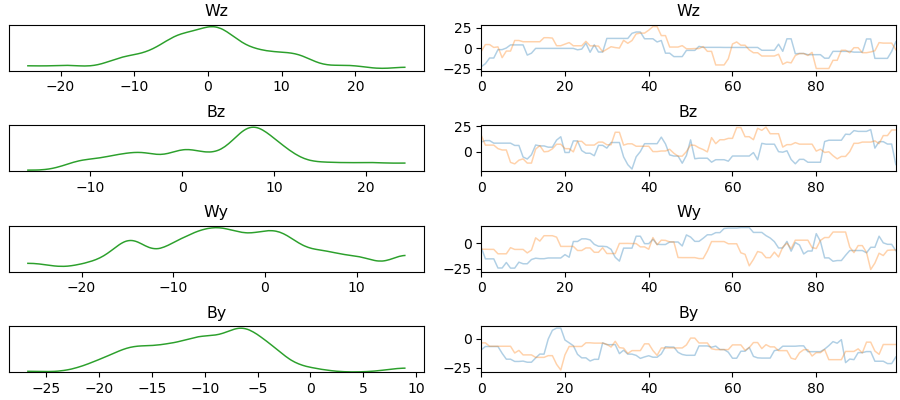

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

In [77]:
pm.traceplot(traceH10_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'], combined=True);

In [78]:
pm.summary(traceH10_100, var_names=['Wz', 'Bz', 'Wy', 'By']).round(3)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Wz  -0.033  9.494 -24.430   13.159      3.318    2.435       8.0     8.0   
Bz   4.578  8.734 -10.983   21.396      1.707    1.220      26.0    26.0   
Wy  -4.082  9.070 -17.752   15.266      2.098    1.507      19.0    19.0   
By -10.122  5.702 -21.261   -2.590      0.844    0.601      46.0    46.0   

    ess_bulk  ess_tail  r_hat  
Wz       8.0      44.0   1.21  
Bz      27.0      69.0   1.08  
Wy      19.0      30.0   1.07  
By      45.0      56.0   1.03

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


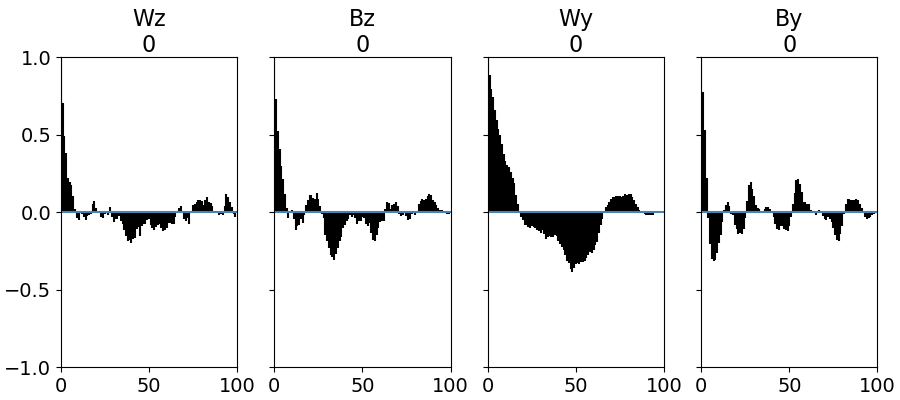

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E03B167B48>,
      dtype=object)

In [79]:
pm.plots.autocorrplot(traceH10_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By'])

C:\Users\manuh\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(rows, cols, **backend_kwargs)


<IPython.core.display.Javascript object>


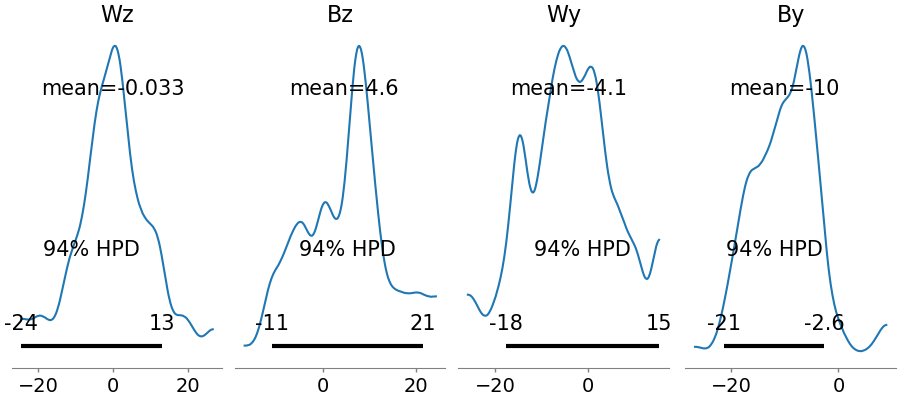

In [80]:
pm.plot_posterior(traceH10_100, figsize=(9, 4), var_names=['Wz', 'Bz', 'Wy', 'By']);

Hint: Si `model_preds` es el posterior predictivo en el conjunto de test donde la primera dimensión son las muestras y la segunda dimensión los ejemplos, podemos graficar la media de ese posterior como:

In [ ]:
pm.sample_posterior_predictive?

In [ ]:
#Modelo pymc3
import pymc3 as pm
import theano.tensor as T
from theano.tensor.nnet import sigmoid
mu=0
def modelo(M):
    with pm.Model() as bayes_reg:
        #Considerar los datos X como una variable deterministica
        X_data = pm.Data("x", x)
        # Se definen los prior
        Wz = pm.Normal(name='Wz', mu=0, sd=10, shape=(2,M))
        Bz = pm.Normal(name='Bz', mu=0, sd=10, shape=(M))
        Wy = pm.Normal(name='Wy', mu=0, sd=10, shape=(M,1))
        By = pm.Normal(name='By', mu=0, sd=10, shape=(1))
        #Verosimilitud
        Y_obs = pm.Bernoulli('Y_obs', p=Y, observed=y)
    return bayes_reg

In [137]:
with modelo(M):
    pm.set_data({"x": x_test})
    posterior_predictive = pm.sample_posterior_predictive(trace1_10, samples=100, 
                                                          var_names=['Y_obs'])

100%|██████████| 100/100 [00:00<00:00, 657.12it/s]


In [139]:
posterior_predictive['Y_obs'].shape

(100, 10, 10)

<IPython.core.display.Javascript object>


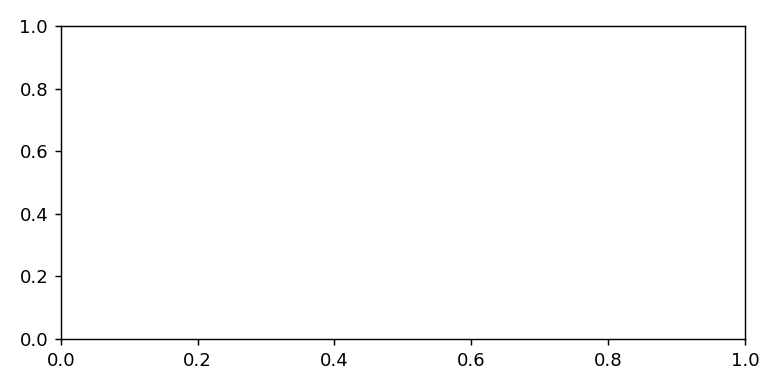

ValueError: cannot reshape array of size 20000 into shape (100,100)

In [91]:
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
cmap = ax.pcolormesh(x1, x2, np.mean(posterior_predictive, axis=0).reshape(len(x1), len(x2)), 
                     cmap=plt.cm.RdBu_r, shading='gouraud', vmin=0, vmax=1)
plt.colorbar(cmap, ax=ax)
ax.scatter(x[y==0, 0], x[y==0, 1], c='k', marker='o')
ax.scatter(x[y==1, 0], x[y==1, 1], c='k', marker='x')